# Exploratory Data Analysis
The objective of this notebook is to compute some statistics and visualizations to understand the data better once the corpus is created.

In [420]:
import pandas as pd
import numpy as np
import requests
from dotenv import load_dotenv
import os
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidzhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/davidzhu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidzhu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [421]:
DATA_PATH = os.path.join("..", 'data')
CORPUS_FILENAME = 'dataset-v1.pkl'

CORPUS_FILE = os.path.join(DATA_PATH, CORPUS_FILENAME)

## Import Corpus

In [422]:
input_df = pd.read_pickle(CORPUS_FILE)

In [423]:
# convert every issue that is not "spam" to "not-spam"
df = pd.DataFrame(columns=['label', 'text'])
df['label'] = input_df['labels'].apply(lambda x: 'spam' if 'spam' in x else 'not-spam')
df['text'] = input_df['title'] + " " + input_df['body']

## Preprocess
Before analyzing the text data, it's best-practice to do pre-processing. For reference, read [this article](https://medium.com/@maleeshadesilva21/preprocessing-steps-for-natural-language-processing-nlp-a-beginners-guide-d6d9bf7689c9)
- Stem
- Lemmatize
- Lowercase
- etc

### Define regex that will be used to clean the text

In [424]:
code_block_pattern = r"```([\w\W]*?)```" # matches all code blocks enclosed in triple backticks ```
code_pattern = r"`([\w\W]*?)`" # matches all code blocks enclosed in single backticks `
url_pattern = r"http\S+" # matches all urls
new_line_pattern = r'[\r|\n]' # matches all new lines and carriage returns
non_word_pattern = r'[^\w\s]' # matches all non-word characters (only retains alphanumeric and underscores)
number_pattern = r'\S*\d+\S*' # matches all words that contain numbers

def clean(text):
    text = re.sub(code_block_pattern, ' ', text)
    text = re.sub(code_pattern, ' ', text)
    text = re.sub(url_pattern, ' ', text)
    text = re.sub(new_line_pattern, ' ', text)
    text = re.sub(non_word_pattern, '', text)
    text = re.sub(number_pattern, ' ', text)
    return text

### Applying lowercase for all characters and preprocessing the data
The data is cleaned using the regex defined above

In [425]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

df['text'] = df['text'].apply(clean)

### Tokenization

In [426]:
df['text'] = df['text'].apply(word_tokenize)

### Removing stop words

In [427]:
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])
df

,label,text
0,not-spam,"[missing, migrations, libavif, pinned, condaforge, pinnings, comment, debugging, strange, resolutions, boiled, cusersstraversaroconda, create, n, test, channels, robostackstaging, condaforge, platform, collecting, package, metadata, repodatajson, done, solving, environment, failed, libmambaunsatisfiableerror, encountered, problems, solving, package, requires, none, providers, installed, could, solve, environment, specs, following, packages, incompatible, ffmpeg, installable, potential, options, ffmpeg, would, require, aom, installed, installed, ffmpeg, would, require, aom, conflicts, installable, versions, previously, reported, ffmpeg, would, require, aom, conflicts, installable, versions, previously, reported, ffmpeg, would, require, aom, conflicts, installable, versions, previously, reported, pygame, installable, requires, viable, options, would, require, libavif, requires, aom, conflicts, installable, versions, previously, reported, would, require, libavif, viable, options, ...]"
1,not-spam,"[ui, feedback, uag, search, button, need, click, search, button, click, area, write, type, enter, keyboard, enough, understand, highlight, done, several, lenses, applied, difficult, understand, available, local, language, lack, consistency, appearance, font, capital, letters, functionality, basic]"
2,not-spam,"[issues, resolved, welcome, repository]"
3,not-spam,"[create, account, rules, broken, error, prompt]"
4,not-spam,"[nan, search, results, table, general, question, something, canshould, make, less, brittle, passing, nans, search, result, table, functionsoperations, fine, seem, sensible, missing, data, values, want, easily, maintainable, robust, reasonably, process, working, discovered, nans, added, pandas, dataframe, search, result, table, broke, things, unexpected, ways, particularly, nan, datauri, got, passed, astroquerymastobservationsget_cloud_uris, nans, get, introduced, query, columns, empty, use, pdconcat, join, tables, together, astroquerymast, observations, outer, join, preserve, much, information, columns, possible, recent, example, example, wasnt, issue, mainline, lightkurve, concatenate, dataframe, tesscut, information, main, selftable, however, main, selftable, also, lots, nans, similar, operation, concatenate, tables, astroquerymastobservationsquery_criteria, astroquerymastobservationsget_product_list, may, representative, future, concerns, expand, run, operations, ...]"
...,...,...
1816,spam,"[want, explicit, sex, secs, ring, costs, gsex, pobox]"
1817,spam,"[asked, chatlines, inclu, free, mins, india, cust, servs, sed, yes, got, mega, bill, dont, giv, shit, bailiff, due, days, want]"
1818,spam,"[contract, mobile, mnths, latest, motorola, nokia, etc, free, double, mins, amp, text, orange, tariffs, text, yes, callback, remove, records]"
1819,spam,"[reminder, get, pounds, free, call, credit, details, great, offers, pls, reply, text, valid, name, house, postcode]"


### Lemmatization

In [428]:
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # return lemmatized tokens as a list
    return lemmas
    

# apply lemmatization function to column of dataframe
df['lemmatized_text'] = df['text'].apply(lemmatize_tokens)

In [ ]:
spam_df = df[df['label'] == 'spam']
non_spam_df = df[df['label'] == 'not-spam']

## Statistics
We can learn a lot about our text data through standard statistical metrics. For reference, read [this article](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools). Compute each statistic individually for spam and not-spam issues

### Average token count

In [ ]:
spam_average_token_count =  spam_df['lemmatized_text'].apply(lambda x: len(x)).mean()
non_spam_average_token_count = non_spam_df['lemmatized_text'].apply(lambda x: len(x)).mean()

print(f"Average token count for spam issues: {spam_average_token_count:.2f}")
print(f"Average token count for non-spam issues: {non_spam_average_token_count:.2f}")

Average token count for spam issues: 19.72
Average token count for non-spam issues: 87.40


### Type-Token ratio

In [ ]:
total_spam_words = spam_df['lemmatized_text'].explode()
unique_spam_words = total_spam_words.unique()

total_non_spam_words = non_spam_df['lemmatized_text'].explode()
unique_non_spam_words = total_non_spam_words.unique()

In [ ]:
print(f"Total spam words: {len(total_spam_words)}")
print(f"Unique spam words: {len(unique_spam_words)}")
print(f"Total non-spam words: {len(total_non_spam_words)}")
print(f"Unique non-spam words: {len(unique_non_spam_words)}")

print(f"Type token ratio for spam: {len(unique_spam_words) / len(total_spam_words):.3f}")
print(f"Type token ratio for non-spam: {len(unique_non_spam_words) / len(total_non_spam_words):.3f}")

Total spam words: 16189
Unique spam words: 2687
Total non-spam words: 87399
Unique non-spam words: 13986
Type token ratio for spam: 0.166
Type token ratio for non-spam: 0.160


## Visualizations
Visualize each of the following individually for spam and not-spam issues. [Reference](https://medium.com/@melody.zapotoczny/a-quick-easy-guide-to-text-analysis-seaborn-4c1a20addba3)
- Most frequent unigrams (words), bigrams(pairs of words), trigrams
- Average issue content (issue title + issue body) length
- Histogram of issue content length

In [ ]:
common_spam_words = Counter(total_spam_words).most_common(10)
common_non_spam_words = Counter(total_non_spam_words).most_common(10)

spam_words, spam_count = zip(*common_spam_words)
non_spam_words, non_spam_count = zip(*common_non_spam_words)

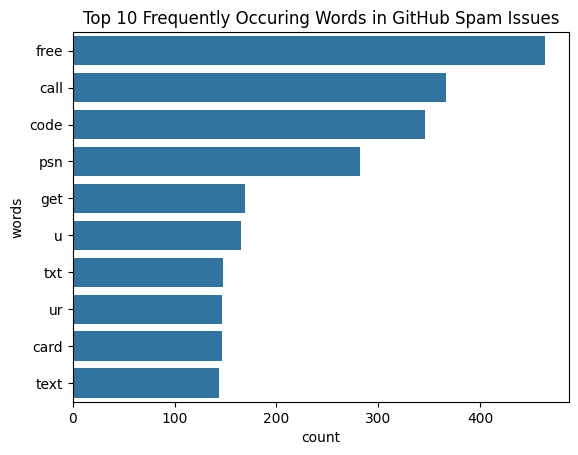

In [ ]:
plot = sns.barplot(
    data={'words': spam_words, 'count': spam_count},
    x='count', 
    y='words').set_title('Top 10 Frequently Occuring Words in GitHub Spam Issues')


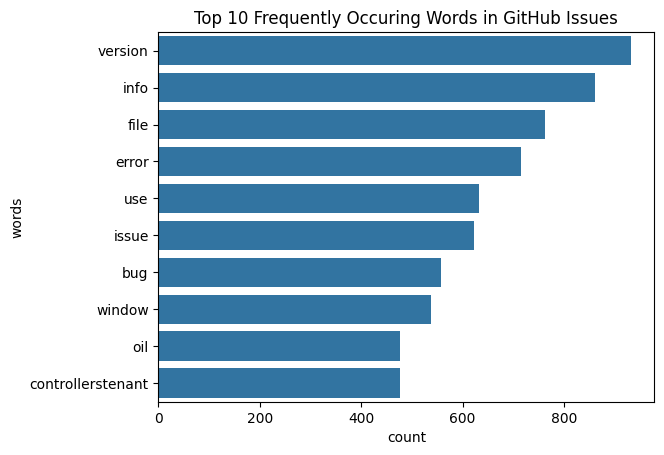

In [ ]:
plot = sns.barplot(
    data={'words': non_spam_words, 'count': non_spam_count},
    x='count', 
    y='words').set_title('Top 10 Frequently Occuring Words in GitHub Issues')


In [ ]:
def get_top_ngram(corpus: pd.DataFrame, n: int):
    cv = CountVectorizer(ngram_range=(n,n))
    ngrams = cv.fit_transform(corpus)

    vocab = cv.vocabulary_

    count_values = ngrams.toarray().sum(axis=0)

    return pd.DataFrame(sorted([(count_values[i], k) for k, i in vocab.items()], reverse = True))

Text(0.5, 1.0, 'Top 10 Most Frequently Occuring Bigrams in Spam Issues')

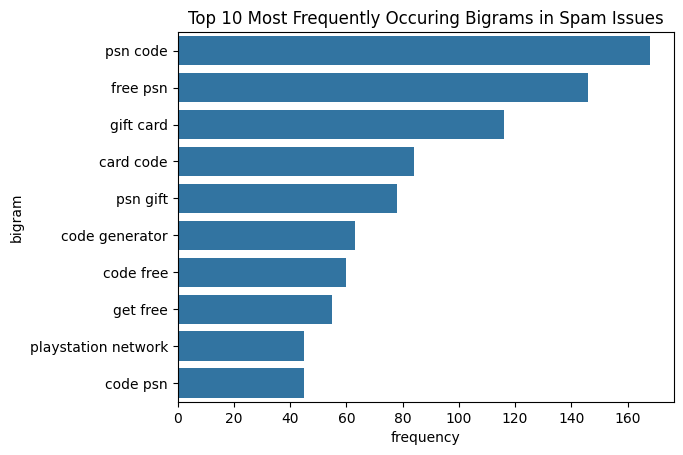

In [ ]:
spam_bigrams = get_top_ngram(spam_df['lemmatized_text'].apply(lambda x: ' '.join(x)), 2)[:10]
sns.barplot(data={
    'frequency': spam_bigrams[0],
    'bigram': spam_bigrams[1]
},
x='frequency',
y='bigram').set_title('Top 10 Most Frequently Occuring Bigrams in Spam Issues')

Text(0.5, 1.0, 'Top 10 Most Frequently Occuring Bigrams in Spam Issues')

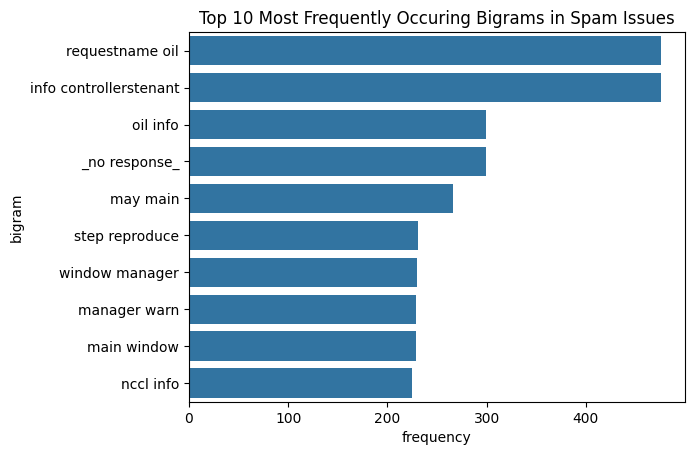

In [ ]:
non_spam_bigram = get_top_ngram(non_spam_df['lemmatized_text'].apply(lambda x: ' '.join(x)), 2)[:10]
sns.barplot(data={
    'frequency': non_spam_bigram[0],
    'bigram': non_spam_bigram[1]
},
x='frequency',
y='bigram').set_title('Top 10 Most Frequently Occuring Bigrams in Spam Issues')

Text(0.5, 1.0, 'Top 10 Most Frequently Occuring Trigrams in Spam Issues')

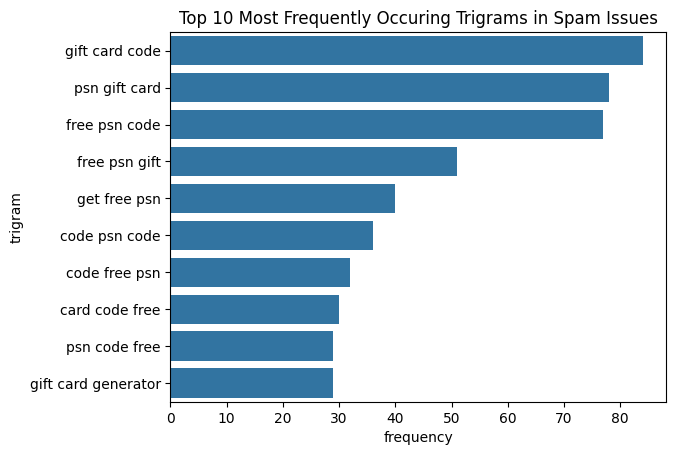

In [ ]:
spam_trigrams = get_top_ngram(spam_df['lemmatized_text'].apply(lambda x: ' '.join(x)), 3)[:10]
sns.barplot(data={
    'frequency': spam_trigrams[0],
    'trigram': spam_trigrams[1]
},
x='frequency',
y='trigram').set_title('Top 10 Most Frequently Occuring Trigrams in Spam Issues')

Text(0.5, 1.0, 'Top 10 Most Frequently Occuring Trigram in Spam Issues')

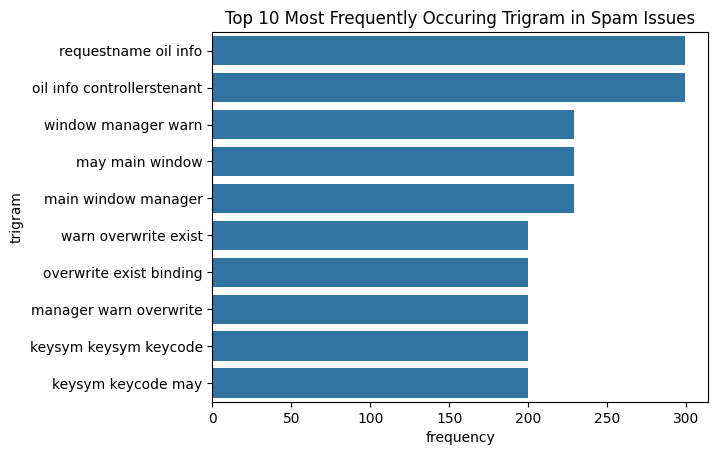

In [ ]:
non_spam_trigram = get_top_ngram(non_spam_df['lemmatized_text'].apply(lambda x: ' '.join(x)), 3)[:10]
sns.barplot(data={
    'frequency': non_spam_trigram[0],
    'trigram': non_spam_trigram[1]
},
x='frequency',
y='trigram').set_title('Top 10 Most Frequently Occuring Trigram in Spam Issues')